## Demonstrate simple x^2 function

In [24]:
from matplotlib import pyplot

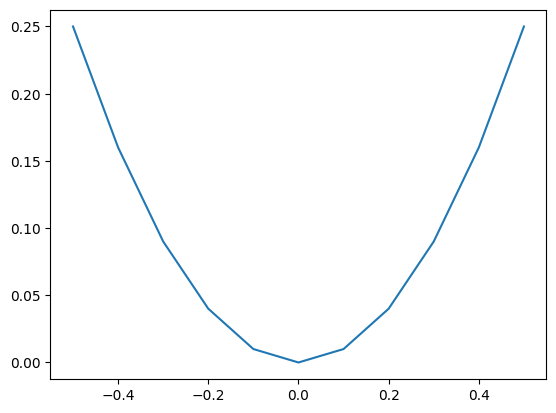

In [25]:


# simple function
def calculate(x):
 return x * x

# define inputs
inputs = [-0.5, -0.4, -0.3, -0.2, -0.1, 0, 0.1, 0.2, 0.3, 0.4, 0.5]
# calculate outputs
outputs = [calculate(x) for x in inputs]
# plot the result
pyplot.plot(inputs, outputs)
pyplot.show()

# example of generating random samples from X^2

In [26]:
from numpy.random import rand
from numpy import hstack
from matplotlib import pyplot

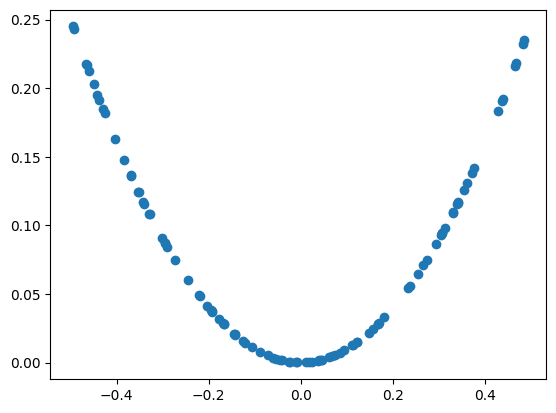

In [27]:
# generate randoms sample from x^2
def generate_samples(n=100):
	# generate random inputs in [-0.5, 0.5]
	X1 = rand(n) - 0.5
	# generate outputs X^2 (quadratic)
	X2 = X1 * X1
	# stack arrays
	X1 = X1.reshape(n, 1)
	X2 = X2.reshape(n, 1)
	return hstack((X1, X2))

# generate samples
data = generate_samples()
# plot samples
pyplot.scatter(data[:, 0], data[:, 1])
pyplot.show()

# define the discriminator model

In [28]:
# define and fit a discriminator model
from numpy import zeros
from numpy import ones
from numpy import hstack
from numpy.random import rand
from numpy.random import randn
from keras.models import Sequential
from keras.layers import Dense
from keras.utils import plot_model

Model: "sequential_10"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_18 (Dense)            (None, 25)                75        
                                                                 
 dense_19 (Dense)            (None, 1)                 26        
                                                                 
Total params: 101 (404.00 Byte)
Trainable params: 101 (404.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


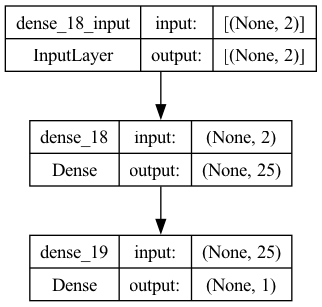

In [29]:
# define the standalone discriminator model
def define_discriminator(n_inputs=2):
	model = Sequential()
	model.add(Dense(25, activation='relu', kernel_initializer='he_uniform', input_dim=n_inputs))
	model.add(Dense(1, activation='sigmoid'))
	# compile model
	model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
	return model

# define the discriminator model
discriminator = define_discriminator()
# summarize the model
discriminator.summary()
# plot the model
plot_model(discriminator, to_file='images/discriminator_plot.png', show_shapes=True, show_layer_names=True)

In [30]:
# generate n real samples with class labels
def generate_real_samples(n):
	# generate inputs in [-0.5, 0.5]
	X1 = rand(n) - 0.5
	# generate outputs X^2
	X2 = X1 * X1
	# stack arrays
	X1 = X1.reshape(n, 1)
	X2 = X2.reshape(n, 1)
	X = hstack((X1, X2))
	# generate class labels
	y = ones((n, 1))
	return X, y

In [31]:
# generate n fake samples with class labels
def generate_fake_samples(n):
	# generate inputs in [-1, 1]
	X1 = -1 + rand(n) * 2
	# generate outputs in [-1, 1]
	X2 = -1 + rand(n) * 2
	# stack arrays
	X1 = X1.reshape(n, 1)
	X2 = X2.reshape(n, 1)
	X = hstack((X1, X2))
	# generate class labels
	y = zeros((n, 1))
	return X, y

In [32]:
# train the discriminator model
def train_discriminator(model, n_epochs=1000, n_batch=128):
	half_batch = int(n_batch / 2)
	# run epochs manually
	for i in range(n_epochs):
		# generate real examples
		X_real, y_real = generate_real_samples(half_batch)
		# update model
		model.train_on_batch(X_real, y_real)
		# generate fake examples
		X_fake, y_fake = generate_fake_samples(half_batch)
		# update model
		model.train_on_batch(X_fake, y_fake)
		# evaluate the model
		_, acc_real = model.evaluate(X_real, y_real, verbose=0)
		_, acc_fake = model.evaluate(X_fake, y_fake, verbose=0)
		print(i, acc_real, acc_fake)

In [33]:
# fit the model
train_discriminator(discriminator)

0 0.25 0.859375
1 0.28125 0.6875
2 0.484375 0.78125
3 0.3125 0.828125
4 0.3125 0.84375
5 0.203125 0.734375
6 0.265625 0.703125
7 0.296875 0.765625
8 0.28125 0.765625
9 0.265625 0.8125
10 0.28125 0.828125
11 0.296875 0.8125
12 0.1875 0.828125
13 0.265625 0.8125
14 0.109375 0.90625
15 0.25 0.875
16 0.328125 0.828125
17 0.40625 0.828125
18 0.203125 0.8125
19 0.3125 0.890625
20 0.265625 0.859375
21 0.359375 0.84375
22 0.3125 0.8125
23 0.234375 0.859375
24 0.296875 0.828125
25 0.203125 0.765625
26 0.171875 0.90625
27 0.203125 0.796875
28 0.265625 0.828125
29 0.234375 0.890625
30 0.28125 0.9375
31 0.34375 0.8125
32 0.1875 0.8125
33 0.265625 0.828125
34 0.234375 0.953125
35 0.25 0.90625
36 0.34375 0.875
37 0.21875 0.90625
38 0.296875 0.84375
39 0.28125 0.859375
40 0.265625 0.90625
41 0.296875 0.90625
42 0.3125 0.875
43 0.34375 0.84375
44 0.234375 0.859375
45 0.234375 0.765625
46 0.3125 0.796875
47 0.1875 0.796875
48 0.25 0.859375
49 0.234375 0.90625
50 0.1875 0.84375
51 0.25 0.921875
52 0.265

# define the generator model

In [34]:
from keras.models import Sequential
from keras.layers import Dense
from keras.utils import plot_model

In [35]:


# define the standalone generator model
def define_generator(latent_dim, n_outputs=2):
	model = Sequential()
	model.add(Dense(15, activation='relu', kernel_initializer='he_uniform', input_dim=latent_dim))
	model.add(Dense(n_outputs, activation='linear'))
	return model


In [36]:
# generate points in latent space as input for the generator
def generate_latent_points(latent_dim, n):
	# generate points in the latent space
	x_input = randn(latent_dim * n)
	# reshape into a batch of inputs for the network
	x_input = x_input.reshape(n, latent_dim)
	return x_input

In [43]:
# use the generator to generate n fake examples, with class labels
def generate_fake_samples(generator, latent_dim, n):
	# generate points in latent space
	x_input = generate_latent_points(latent_dim, n)
	# predict outputs
	X = generator.predict(x_input)
	# create class labels
	y = zeros((n, 1))
	return X, y

4/4 [==============================] - 0s 1ms/step


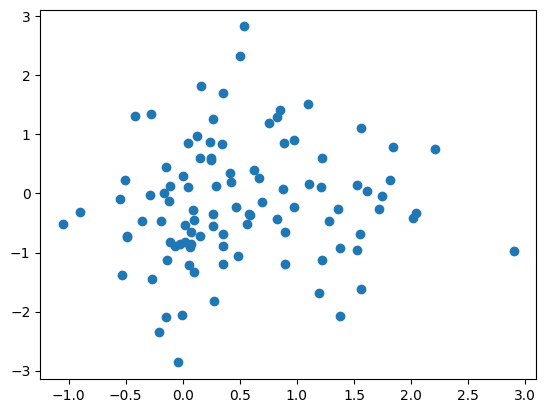

Model: "sequential_11"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_20 (Dense)            (None, 15)                90        
                                                                 
 dense_21 (Dense)            (None, 2)                 32        
                                                                 
Total params: 122 (488.00 Byte)
Trainable params: 122 (488.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


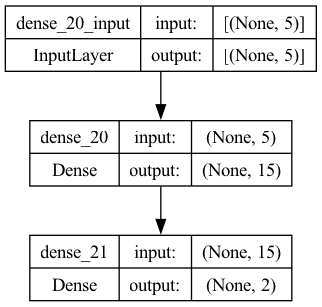

In [38]:
# size of the latent space
latent_dim = 5
# define the generator model
generator = define_generator(latent_dim)
# generate and plot generated samples
generate_fake_samples(generator, latent_dim, 100)

# summarize the model
generator.summary()
# plot the model
plot_model(generator, to_file='images/generator_plot.png', show_shapes=True, show_layer_names=True)

# define the combined generator and discriminator model, for updating the generator

In [39]:
def define_gan(generator, discriminator):
	# make weights in the discriminator not trainable
	discriminator.trainable = False
	# connect them
	model = Sequential()
	# add generator
	model.add(generator)
	# add the discriminator
	model.add(discriminator)
	# compile model
	model.compile(loss='binary_crossentropy', optimizer='adam')
	return model

Model: "sequential_12"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 sequential_11 (Sequential)  (None, 2)                 122       
                                                                 
 sequential_10 (Sequential)  (None, 1)                 101       
                                                                 
Total params: 223 (892.00 Byte)
Trainable params: 122 (488.00 Byte)
Non-trainable params: 101 (404.00 Byte)
_________________________________________________________________


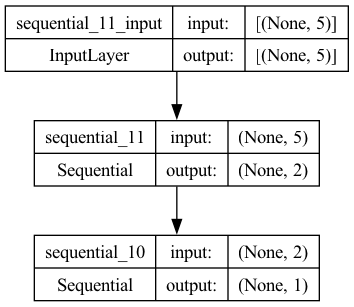

In [40]:
# create the gan
gan_model = define_gan(generator, discriminator)
# summarize gan model
gan_model.summary()
# plot gan model
plot_model(gan_model, to_file='images/gan_plot.png', show_shapes=True, show_layer_names=True)

In [48]:
# evaluate the discriminator and plot real and fake points
def summarize_performance(epoch, generator, discriminator, latent_dim, n=100):
	# prepare real samples
	x_real, y_real = generate_real_samples(n)
	# evaluate discriminator on real examples
	_, acc_real = discriminator.evaluate(x_real, y_real, verbose=0)
	# prepare fake examples
	x_fake, y_fake = generate_fake_samples(generator, latent_dim, n)
	# evaluate discriminator on fake examples
	_, acc_fake = discriminator.evaluate(x_fake, y_fake, verbose=0)
	# summarize discriminator performance
	print(epoch, acc_real, acc_fake)
	# scatter plot real and fake data points
	pyplot.scatter(x_real[:, 0], x_real[:, 1], color='red')
	pyplot.scatter(x_fake[:, 0], x_fake[:, 1], color='blue')
	pyplot.savefig('images/performance.png')
	pyplot.show()

In [46]:
# train the generator and discriminator
def train(g_model, d_model, gan_model, latent_dim, n_epochs=10000, n_batch=128, n_eval=2000):
	# determine half the size of one batch, for updating the discriminator
	half_batch = int(n_batch / 2)
	# manually enumerate epochs
	for i in range(n_epochs):
		# prepare real samples
		x_real, y_real = generate_real_samples(half_batch)
		# prepare fake examples
		x_fake, y_fake = generate_fake_samples(g_model, latent_dim, half_batch)
		# update discriminator
		d_model.train_on_batch(x_real, y_real)
		d_model.train_on_batch(x_fake, y_fake)
		# prepare points in latent space as input for the generator
		x_gan = generate_latent_points(latent_dim, n_batch)
		# create inverted labels for the fake samples
		y_gan = ones((n_batch, 1))
		# update the generator via the discriminator's error
		gan_model.train_on_batch(x_gan, y_gan)
		# evaluate the model every n_eval epochs
		if (i+1) % n_eval == 0:
			summarize_performance(i, g_model, d_model, latent_dim)

4/4 [==============================] - 0s 1ms/step
1999 0.5799999833106995 0.44999998807907104


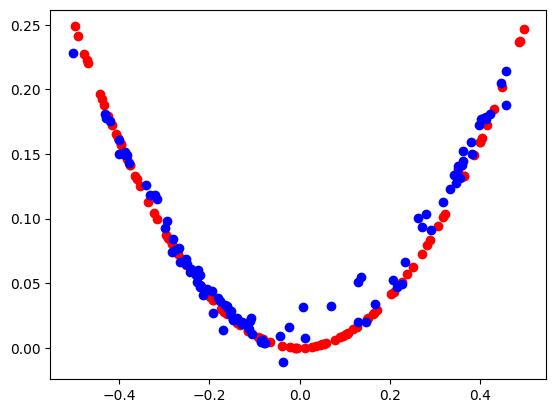

4/4 [==============================] - 0s 1ms/step
3999 0.75 0.5199999809265137


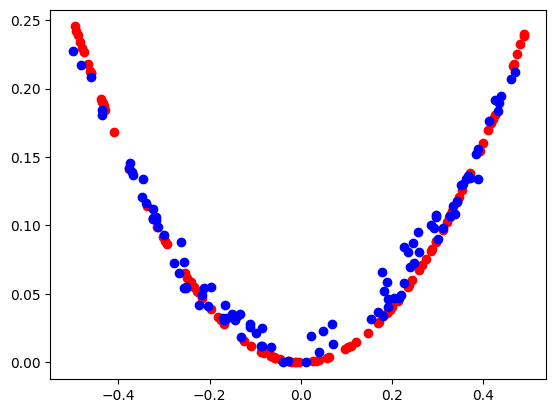

4/4 [==============================] - 0s 1ms/step
5999 0.8100000023841858 0.47999998927116394


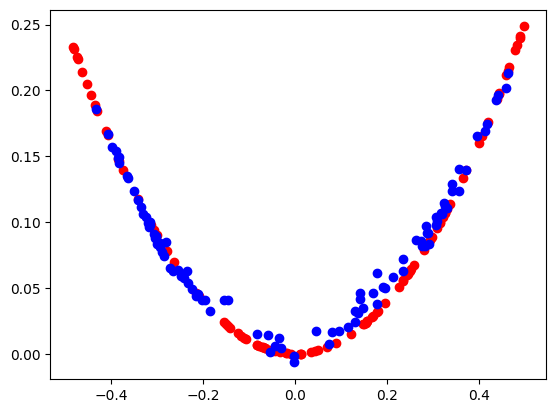

4/4 [==============================] - 0s 1ms/step
7999 0.6100000143051147 0.6800000071525574


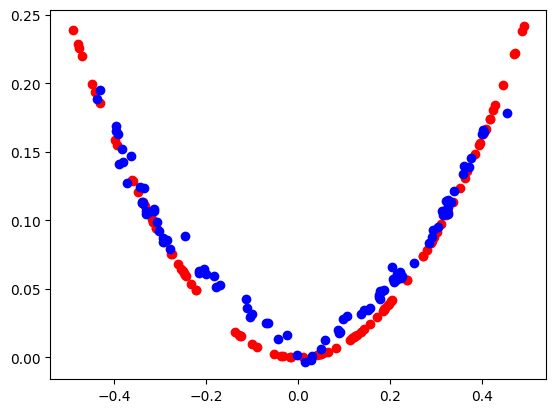

4/4 [==============================] - 0s 1ms/step
9999 0.6299999952316284 0.6800000071525574


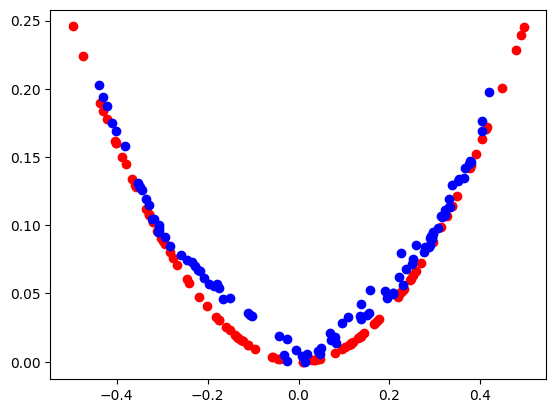

In [47]:
# train model
train(generator, discriminator, gan_model, latent_dim)